In [1]:
import itertools
import numpy as np
import pandas as pd
import os
import scipy.sparse
import sys

CURRENT_DIR = os.getcwd()
PARENT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.append(PARENT_DIR)

from FDApy.univariate_functional import UnivariateFunctionalData
from FDApy.irregular_functional import IrregularFunctionalData
from FDApy.multivariate_functional import MultivariateFunctionalData
from FDApy.plot import *
from FDApy.utils import *

In [2]:
# Load the data into Pandas dataframe
cd4 = pd.read_csv(''.join([CURRENT_DIR, '/cd4.csv']), index_col=0)

In [3]:
# Create IrregularFunctionalData for cd4 data
all_argvals = cd4.columns.astype(np.int64)
argvals = [tuple(all_argvals[~np.isnan(row)]) for row in cd4.values]
values = [row[~np.isnan(row)] for row in cd4.values]
cd4counts = IrregularFunctionalData(argvals, values)

In [4]:
# Print example of a IrregularFunctionalData
cd4counts

Irregular Functional data objects with 366 observations of 1-dimensional support
argvals:
	Values in -18 ... 42.
values:
	Values in 10.0 ... 3184.0.
There are 1 - 11 sampling points per observation.

In [5]:
# Accessing the attribut of the classes
cd4counts.argvals

[(-9, -3, 3),
 (-3, 3, 9, 15),
 (-15, -9, -3, 3, 9, 17, 22, 29),
 (-17, -9, -3, 3),
 (-4, 4, 10, 13, 19, 25, 32, 38),
 (-17, -10, 10),
 (-9, -3, 3, 9),
 (-3, 3, 10, 14, 27, 34, 40),
 (-13, -9),
 (-3, 3, 15, 21, 27, 39),
 (-16, -10, -3, 3, 9, 15, 22, 27),
 (-15, -3, 23),
 (-15, -9, -3, 3, 9, 15, 21, 27, 34, 40),
 (-15, -9, -3, 3, 9, 21),
 (-9, -3, 3, 9, 14),
 (-3, 3),
 (-9, -3, 3, 9, 14, 27, 33),
 (3, 9, 15, 39),
 (-3, 3, 9, 14, 21, 27, 33, 39),
 (-3, 3, 9, 15, 21, 33, 39),
 (-14, -9, -3, 3, 15, 21, 32, 39),
 (-16, -10, 10, 16),
 (-3, 3, 9, 39),
 (-9, -3, 3, 21),
 (3, 9, 16, 22),
 (-15, -3, 3, 19),
 (-15, -9, -3, 3, 27, 33, 39),
 (-14, -8, -3, 14, 17, 23, 33, 39),
 (-16, -10, 15, 20, 26, 30, 37),
 (-3, 18),
 (-9, -3, 3, 9, 34, 41),
 (9, 24, 30),
 (-15, -9, -3, 3, 15, 21, 27, 33, 39),
 (3, 9, 15, 21, 28, 33, 39),
 (3, 9),
 (-5, 5),
 (-9, -3, 10, 16, 26),
 (-15, -9, -3, 3, 11, 16, 32),
 (-3, 3, 9, 15, 38),
 (-3, 3, 10),
 (4, 9, 16, 21, 28),
 (-14, -8, -3, 3, 9, 15, 21, 27, 33, 39),
 (-2, 

In [6]:
# Check the values
cd4counts.values

[array([548., 893., 657.]),
 array([752., 459., 181., 434.]),
 array([ 846., 1102.,  801.,  824.,  866.,  704.,  757.,  726.]),
 array([1277., 1132., 1454.,  738.]),
 array([994., 486., 605., 880., 352., 376., 212., 237.]),
 array([1119.,  729.,  355.]),
 array([429., 467., 599., 184.]),
 array([783., 858., 709., 517., 952., 845., 428.]),
 array([2016., 2622.]),
 array([1761., 2271., 1054., 1418., 1886., 1306.]),
 array([ 853., 1369., 1049.,  682.,  328.,  480.,  224.,  440.]),
 array([1568., 1010.,  142.]),
 array([ 561., 1102., 1620.,  697.,  538.,  811.,  592.,  568.,  384.,
         431.]),
 array([ 218., 2241., 1714., 1250.,  499.,  382.]),
 array([1265.,  960.,  944.,  766., 1265.]),
 array([639., 540.]),
 array([1261., 3184., 1225.,  804.,  742.,  756.,  368.]),
 array([584., 447., 439., 340.]),
 array([1159., 1172.,  653.,  741.,  736.,  851.,  717.,  592.]),
 array([933., 876., 178., 727., 539., 756., 649.]),
 array([1536.,  688., 1562.,  547.,  912.,  660.,  477.,  446.]),
 a

In [7]:
# Number of observations for an object
cd4counts.nObs()

366

In [8]:
# Number of sampling points for an object
cd4counts.nObsPoint()

[3,
 4,
 8,
 4,
 8,
 3,
 4,
 7,
 2,
 6,
 8,
 3,
 10,
 6,
 5,
 2,
 7,
 4,
 8,
 7,
 8,
 4,
 4,
 4,
 4,
 4,
 7,
 8,
 7,
 2,
 6,
 3,
 9,
 7,
 2,
 2,
 5,
 7,
 5,
 3,
 5,
 10,
 6,
 6,
 2,
 4,
 7,
 4,
 6,
 6,
 6,
 7,
 4,
 9,
 6,
 6,
 3,
 4,
 4,
 4,
 6,
 4,
 4,
 6,
 4,
 5,
 2,
 5,
 4,
 2,
 5,
 8,
 6,
 2,
 7,
 9,
 4,
 3,
 4,
 2,
 3,
 1,
 5,
 5,
 3,
 8,
 5,
 6,
 5,
 8,
 5,
 9,
 2,
 5,
 5,
 5,
 6,
 5,
 2,
 5,
 7,
 7,
 5,
 7,
 5,
 4,
 9,
 2,
 3,
 9,
 8,
 3,
 8,
 10,
 4,
 6,
 3,
 7,
 6,
 6,
 6,
 9,
 9,
 4,
 7,
 3,
 3,
 7,
 9,
 4,
 6,
 6,
 4,
 1,
 6,
 6,
 8,
 6,
 8,
 6,
 9,
 6,
 2,
 1,
 1,
 1,
 6,
 4,
 3,
 3,
 7,
 7,
 8,
 6,
 3,
 3,
 9,
 8,
 6,
 7,
 9,
 5,
 6,
 6,
 5,
 3,
 2,
 5,
 7,
 3,
 7,
 4,
 3,
 8,
 4,
 5,
 6,
 4,
 10,
 4,
 3,
 6,
 2,
 8,
 11,
 1,
 3,
 8,
 8,
 7,
 2,
 1,
 2,
 4,
 4,
 6,
 1,
 4,
 5,
 7,
 5,
 7,
 8,
 8,
 3,
 3,
 2,
 7,
 5,
 9,
 6,
 4,
 5,
 3,
 6,
 2,
 3,
 1,
 1,
 5,
 5,
 10,
 4,
 3,
 1,
 6,
 2,
 4,
 6,
 3,
 8,
 6,
 7,
 7,
 7,
 5,
 3,
 7,
 6,
 9,
 3,
 9,
 6,
 4,
 1,
 5,
 10,
 10,


In [9]:
# Dimension of the domain of observations
cd4counts.dimension()

1

In [10]:
# Extract observations from IrregularFunctionalData
cd4counts[5:8]

Irregular Functional data objects with 3 observations of 1-dimensional support
argvals:
	Values in -17 ... 40.
values:
	Values in 184.0 ... 1119.0.
There are 3 - 7 sampling points per observation.

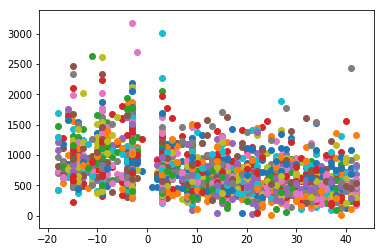

In [11]:
fig, ax = plot(cd4counts)
plt.show()